In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Library/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
##load the data , it is huge. Do not read again 
destinations = pd.read_csv("destinations.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
print("train dataset shape: ", train.shape)
print("test dataset shape: ", test.shape)
train.head()

('train dataset shape: ', (37670293, 24))
('test dataset shape: ', (2528243, 22))


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


<Container object of 100 artists>

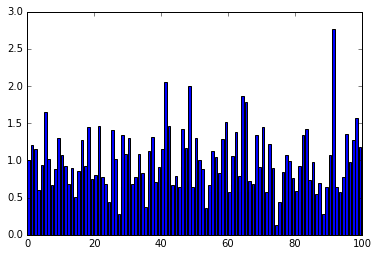

In [19]:
##check the distriubtion of the hotel cluster in the training data
%matplotlib inline 
train_cluster_distribution = train["hotel_cluster"].value_counts()
train_total = np.sum(train_cluster_distribution)
plt.bar(train_cluster_distribution.index, train_cluster_distribution/train_total*100.0 )

In [22]:
###confirm our hypothesis that all the test user ids are found in the train DataFrame.
test_ids = set(test.user_id.unique())
train_ids = set(train.user_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)

##but not all training user id are found the in the test dataset 

True

In [23]:
### convert the date time to year, month 
train["date_time"] = pd.to_datetime(train["date_time"])
train["year"] = train["date_time"].dt.year
train["month"] = train["date_time"].dt.month

In [29]:
##only pick 10000 users 
import random

unique_users = train.user_id.unique()

print("Number of unique users ",unique_users.shape[0])

sel_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), 100000)) ]
sel_train = train[train.user_id.isin(sel_user_ids)]

('Number of unique users ', 1198786)


In [30]:
###Pick new training and testing sets and remove click events 
t1 = sel_train[((sel_train.year == 2013) | ((sel_train.year == 2014) & (sel_train.month < 8)))]
t2 = sel_train[((sel_train.year == 2014) & (sel_train.month >= 8))]
t2 = t2[t2.is_booking == True]
print("new training set number: ", t1.shape[0])
print("new test set number: ", t2.shape[0])

('new training set number: ', 1997933)
('new test set number: ', 82660)


In [31]:
##save the t1, t2 file for the future reuse 
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

pickle_file = 'expedia_small_dataset.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'small_train_dataset': t1,
    'small_test_dataset': t2,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [2]:
## direct read the small test set and training set from the pickle file
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

pickle_file = 'expedia_small_dataset.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  t1 = save['small_train_dataset']
  t2 = save['small_test_dataset']
  del save  # hint to help gc free up memory
  print('Small training set', t1.shape)
  print('Small test set', t2.shape)

('Small training set', (1997933, 26))
('Small test set', (82660, 26))
